In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **EDA-데이터 둘러보기**

In [5]:
data_path = "./"
train=pd.read_csv(data_path+'train.csv')
test=pd.read_csv(data_path+'test.csv')
submission=pd.read_csv(data_path+'sampleSubmission.csv')

In [6]:
#train data와 test data의 데이터 크기 확인
train.shape, test.shape

((10886, 12), (6493, 9))

In [7]:
#train, test data의 column(피쳐) 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Data Fields

- datetime - hourly date + timestamp 
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 
   - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

## 목적 

날씨, 요일, 시간 등의 변수에 따른 이용도 변화 확인
- 설명변수 : 'datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'casual', 
- 종속변수 : 'registered' 또는 'count'

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

In [8]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


test data에는 있는 casual과 registered data가 test data에는 없음. 수량 예측에 해당 feature을 사용할 수 없으므로 casual과 registered를 빼자

In [9]:
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


train, test date 모두 결측치 없음


In [12]:
#필요 없는 피처 제거하기
train.drop(columns=['casual','registered'],inplace=True)

## **EDA-피처엔지니어링**  
-datetime 피처를 구성요소에 따라 연, 월, 일, 시간으로 나누기

In [13]:
def pre_time(df):
    #시간
    df['year'] = df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
    df['month'] = df['datetime'].apply(lambda x:x.split()[0].split('-')[1])
    df['day'] = df['datetime'].apply(lambda x:x.split()[0].split('-')[2])
    df['hour'] = df['datetime'].apply(lambda x:x.split()[1].split(':')[0])
    df['minute'] = df['datetime'].apply(lambda x:x.split()[1].split(':')[1])
    df['second'] = df['datetime'].apply(lambda x:x.split()[1].split(':')[2])
    #요일변수
    import calendar
    from datetime import datetime
    df['date'] = df['datetime'].apply(lambda x:x.split()[0])
    df['weekday'] = df['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
    df.drop(columns=['date'],inplace=True) # year, month, day로 확인 가능한 date 피쳐 제거


season, weather 피쳐를 텍스트 피쳐 바꿔서 명확한 의미를 알도록 한다

In [14]:
def pre_weather(df):
    df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
    df['weather'] = df['weather'].map({1:'Clear', 2:'Mist, Few Clouds', 3:'Light Snow, Rain, Thunderstorm', 4:'Heavy Rain, Thunderstrom, Snow, Fog'})

In [15]:
pre_time(train)
pre_weather(train)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,16,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,40,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,32,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,13,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,1,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear,15.58,19.695,50,26.0027,336,2012,12,19,19,00,00,Wednesday
10882,2012-12-19 20:00:00,Winter,0,1,Clear,14.76,17.425,57,15.0013,241,2012,12,19,20,00,00,Wednesday
10883,2012-12-19 21:00:00,Winter,0,1,Clear,13.94,15.910,61,15.0013,168,2012,12,19,21,00,00,Wednesday
10884,2012-12-19 22:00:00,Winter,0,1,Clear,13.94,17.425,61,6.0032,129,2012,12,19,22,00,00,Wednesday


year, month, day로 확인 가능한 date 피쳐 제거
month를 세 달씩 묶으면 결국 season과 같음. season 피처는 남기고 month 피처는 추후 제거

In [16]:
def preprocess(df):
    pre_time(df)
    pre_weather(df)   

## **EDA-데이터 시각화: 종속변수 count의 분포도 알아보기**

In [17]:
import seaborn as sns
import matplotlib as mpl
import matplotlib .pyplot as plt
%matplotlib inline

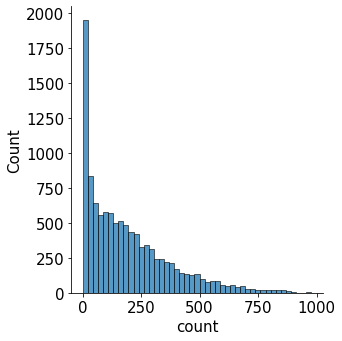

In [18]:
#타깃값인 count의 분포도 알아보기
mpl.rc('font', size=15) #폰트 크기를 15로 설정
sns.displot(data=train, x='count');

왜도 높은 불균형데이터임. 회귀모델 성능향상 위해 정규분포화 필요
→ 로그변환 적용
<br>
모델의 종속변수 적용시에 로그변환을 해주어 쏠림이 없는 분석을 가능하게 변환할 필요가 있다

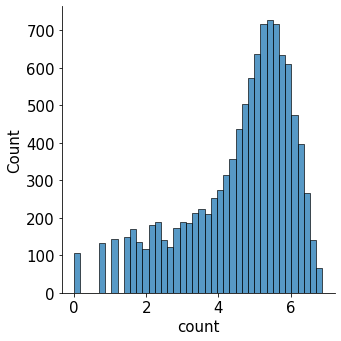

In [19]:
#target값에 로그변환 사용. 주의할 점: 마지막에 지수변환을 하여 실제 타깃값인 count로 복원해야 함(후처리)
sns.displot(np.log(train['count']))

## **EDA-데이터 시각화: 연, 월, 일, 시, 분, 초별로 평균 대여 수량을 막대그래프로 그리기**

In [20]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month', 'day',
       'hour', 'minute', 'second', 'weekday'],
      dtype='object')

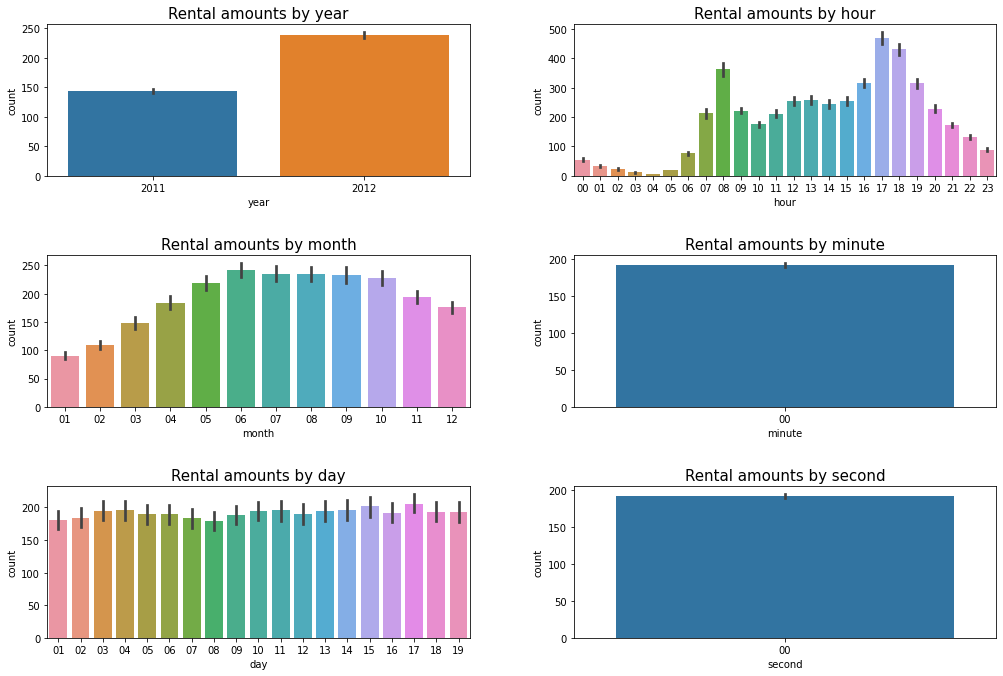

In [21]:
mpl.rc('font', size=10) #폰트 크기 설정
mpl.rc('axes', titlesize=15) #각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) #3행 2열로 막대그래프 생성. 
plt.tight_layout() #그래프 사이에 여백 확보
figure.set_size_inches(15, 10) #전체 figure 크기를 10X9 인치로 설정
time_li = ['year', 'month', 'day','hour', 'minute', 'second'] 
for i,c in enumerate(time_li):
    j = i%3
    k = i//3
    sns.barplot(data=train, x=c, y='count', ax=axes[j,k])  
    #그래프별 제목 짓기
    axes[j,k].set(title=f"Rental amounts by {c}")


1. 2012년에 2011년보다 대여량이 많음
2. 월별 대여량은 6월이 최대치, 1월이 최소치. 날씨가 따뜻해지면서 대여수량이 늘어나는 듯
3. 일별 대여량에는 큰 차이가 없음. 그리고 train data에는 1일부터 19일까지만 있고 test data에는 20일부터 월말까지 있기 때문에 day data는 사용 못함. day feature는 제거해야 함
4. 시간별 대여량을 보면 오전 8시, 저녁 5시~6시 대여가 많음. 출근 시간과 퇴근 시간에 많이 사용하는걸까?
5. 분별, 초별 대여량은 아무 소용도 없음. 피처를 제거 가능

In [22]:
#필요없는 피처 제거(day, minute, second)
train.drop(columns=['day', 'minute', 'second'], inplace=True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,16,2011,01,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,40,2011,01,01,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,32,2011,01,02,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,13,2011,01,03,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,1,2011,01,04,Saturday


## **EDA-데이터 시각화: 계절, 날씨, 공휴일, 근무일별 대여수량을 박스플롯으로 나타내기**

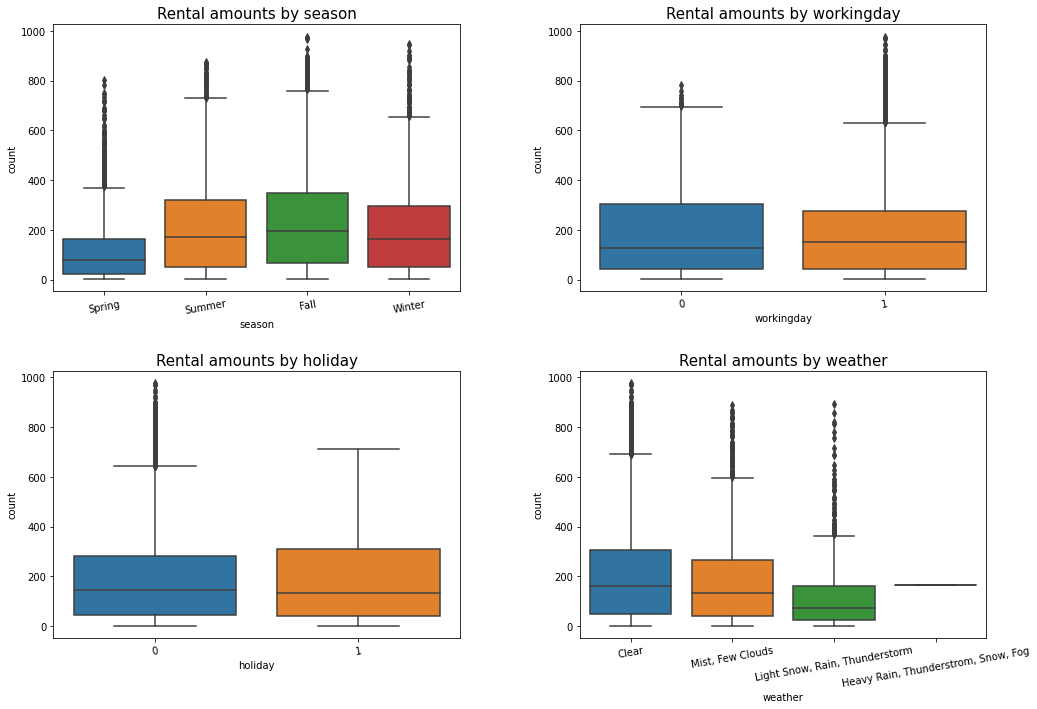

In [23]:
mpl.rc('font', size=10) #폰트 크기 설정
mpl.rc('axes', titlesize=15) #각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=2, ncols=2) #2행 2열로 막대그래프 생성. 
plt.tight_layout() #그래프 사이에 여백 확보
figure.set_size_inches(15, 10) #전체 figure 크기를 10X9 인치로 설정

day_li = ['season', 'holiday', 'workingday', 'weather']

for i,c in enumerate(day_li):
    j = i%2
    k = i//2
    sns.boxplot(data=train, x=c, y='count', ax=axes[j,k])
    axes[j,k].set(title=f"Rental amounts by {c}")
    axes[j,k].tick_params(axis='x', labelrotation=10)

1. 계절별 대여수량을 보면 봄에 대여량이 제일 적고 가을에 가장 많음 : 봄은 이상치가 많음
2. 근무일별 대여수량도 근무일이 아닐 때(0)와 근무일일 때(1)의 중앙값이 거의 비슷함. 하지만 근무일일 때 이상치가 많음
3. 공휴일별 대여수량을 보면 공휴일이 아닐 때와(0) 공휴일일 때(1)의 중앙값은 거의 비슷함. 하지만 공휴일이 아닐 때 이상치가 많음
> 다중 공산성 방지를 위해 holiday나 workingday 필드중 하나를 제거 필요해보임<br>
4. 날씨별 대여수량을 보면 날씨가 좋을수록 대여량이 많음

## **EDA-데이터 시각화: 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량을 포인트플롯으로 나타내기**

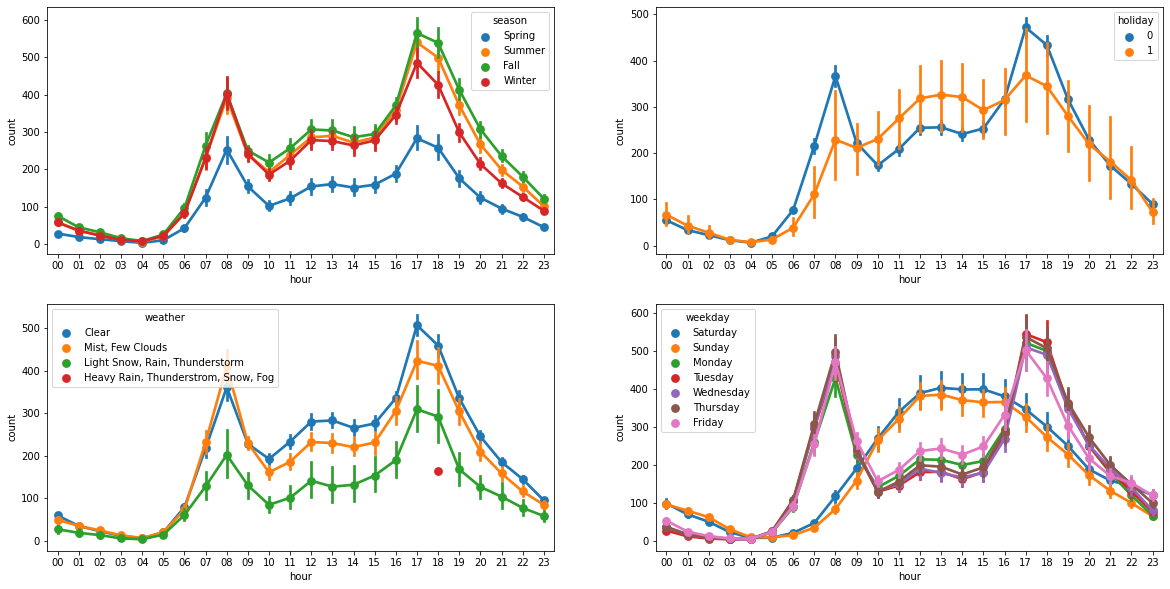

In [24]:
mpl.rc('font', size=10)
figure, axes = plt.subplots(nrows=2,ncols=2) #5행 1열
figure.set_size_inches(20, 10)
day_li = ['season', 'weather','holiday', 'weekday']
for i,c in enumerate(day_li):
    j = i%2
    k = i//2
    sns.pointplot(data=train, x='hour', y='count', hue=c, ax=axes[j,k])

1. 계절 별 시간대 대여량은 비슷한 패턴을 보임
2. 날씨가 좋을수록 대여량이 많으며 폭우, 폭설일 때는 대여량 거의 없음. 18시쯤 이상치가 있는데 이 이상치는 제거하는 게 나을 것
3. 휴일은 오전 10시부터 많이 빌리기 시작해서 오후 6시 정도까지 대여량이 많음
4. 근무일에는 출퇴근 시간대에 많이 대여(오전 7-8시), (오후 5-6시)

## **EDA-데이터 시각화: 온도, 체감 온도, 풍속, 습도별 대여 수량을 regplot으로 나타내기**

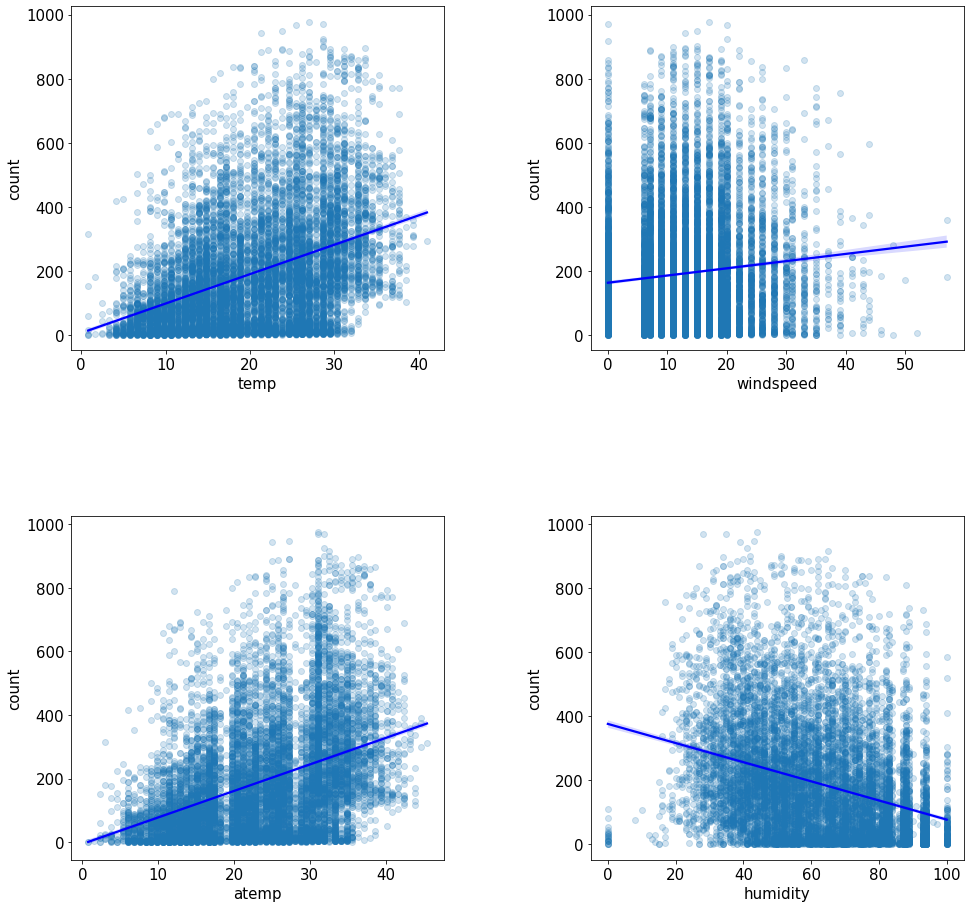

In [25]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) #2행 2열
plt.tight_layout()
figure.set_size_inches(15, 15)
weather_li = ['temp','atemp','windspeed','humidity']

for i,c in enumerate(weather_li):
    j = i%2
    k = i//2
    sns.regplot(data=train, x=c, y='count', ax=axes[j,k], scatter_kws={'alpha':0.2}, line_kws={'color':'blue'})

회귀선 기울기로 대략적인 추세 파악 가능
1. 온도와 체감온도가 높을수록 대여량이 많음
2. 습도가 낮을수록 대여량이 많음
3. 풍속을 보면 속도가 0일 때가 많음. 이것은 실제 풍속이 0이기보다는 관측치가 없거나 오류 때문에 0으로 기록되었을 가능성이 큼. windspeed feature을 삭제하거나 0으로 기록된 수치를 채워넣을 수도 있음

## **EDA-수치형 데이터끼리 어떤 상관관계를 가지는지 알아보기**

In [26]:
#수치형 데이터 = temp, atemp, humidity, windspeed, count 의 상관관계 계수 알아보기
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

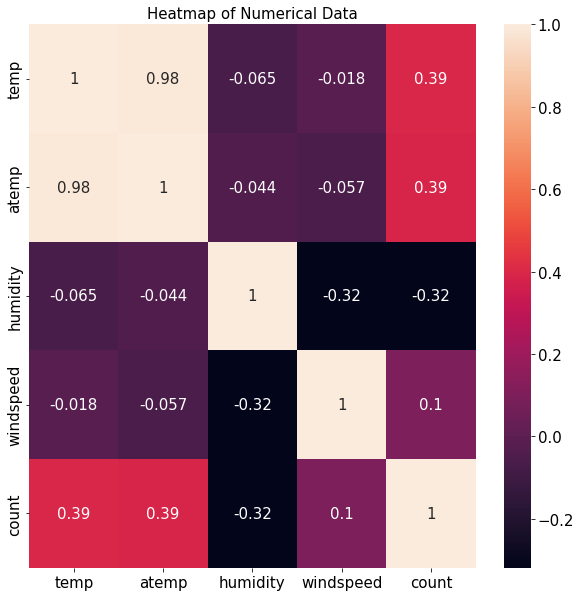

In [27]:
#히트맵 이용하기 
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

sns.heatmap(data=corrMat, annot=True) #annot을 넣으면 상관계수가 숫자로 표시됨
ax.set(title="Heatmap of Numerical Data")

# 모델링

**베이스라인모델: 피쳐 엔지니어링**

In [28]:
#EDA에서와 달리 모델링에서는 train, test data를 함께 변환해야 함
#train, test data를 합쳐서 피쳐엔지니어링을 해보자. 

**베이스라인모델: 피쳐 엔지니어링-폭우, 폭설일 때의 18시 대여 이상치 제거하기**

In [30]:
data_path = "./"
train=pd.read_csv(data_path+'train.csv')
test=pd.read_csv(data_path+'test.csv')
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [31]:
train = train[train['weather']!=4]

In [32]:
#train과 test 데이터 합치기
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [33]:
preprocess(all_data)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011,01,01,04,00,00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,Spring,0,1,"Mist, Few Clouds",10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,19,00,00,Monday
17374,2012-12-31 20:00:00,Spring,0,1,"Mist, Few Clouds",10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,20,00,00,Monday
17375,2012-12-31 21:00:00,Spring,0,1,Clear,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012,12,31,21,00,00,Monday
17376,2012-12-31 22:00:00,Spring,0,1,Clear,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012,12,31,22,00,00,Monday


**베이스라인모델: 피쳐 엔지니어링-feature 선택하기**

In [34]:
to_drop = ['datetime','workingday','minute','second','registered','month','day','casual']
all_data.drop(to_drop,axis=1,inplace=True)
all_data

,season,holiday,weather,temp,atemp,humidity,windspeed,count,year,hour,weekday
0,Spring,0,Clear,9.84,14.395,81,0.0000,16.0,2011,00,Saturday
1,Spring,0,Clear,9.02,13.635,80,0.0000,40.0,2011,01,Saturday
2,Spring,0,Clear,9.02,13.635,80,0.0000,32.0,2011,02,Saturday
3,Spring,0,Clear,9.84,14.395,75,0.0000,13.0,2011,03,Saturday
4,Spring,0,Clear,9.84,14.395,75,0.0000,1.0,2011,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
17373,Spring,0,"Mist, Few Clouds",10.66,12.880,60,11.0014,NaN,2012,19,Monday
17374,Spring,0,"Mist, Few Clouds",10.66,12.880,60,11.0014,NaN,2012,20,Monday
17375,Spring,0,Clear,10.66,12.880,60,11.0014,NaN,2012,21,Monday
17376,Spring,0,Clear,10.66,13.635,56,8.9981,NaN,2012,22,Monday


In [35]:
all_data_dummies = pd.get_dummies(all_data)
all_data_dummies

,holiday,temp,atemp,humidity,windspeed,count,season_Fall,season_Spring,season_Summer,season_Winter,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,9.84,14.395,81,0.0000,16.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,9.02,13.635,80,0.0000,40.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,9.02,13.635,80,0.0000,32.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,9.84,14.395,75,0.0000,13.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,9.84,14.395,75,0.0000,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,0,10.66,12.880,60,11.0014,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
17374,0,10.66,12.880,60,11.0014,NaN,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
17375,0,10.66,12.880,60,11.0014,NaN,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
17376,0,10.66,13.635,56,8.9981,NaN,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


**베이스라인모델: 데이터 나누기**
-피처 엔지니어링이 끝났으니 train data와 test data를 다시 나눔

In [36]:
#train과 test로 나누기
X_train = all_data_dummies[~pd.isnull(all_data_dummies['count'])]
X_test = all_data_dummies[pd.isnull(all_data_dummies['count'])]


#train과 test의 feature들을 독립변수와 종속변수(타깃값)으로 나누기
X_train = X_train.drop(columns = ['count'], axis=1)
X_test = X_test.drop(columns = ['count'], axis=1)
y_train = all_data_dummies[~pd.isnull(all_data_dummies['count'])]['count']
y_test = all_data_dummies[pd.isnull(all_data_dummies['count'])]['count']

**베이스라인모델: 평가지표 계산 함수 작성**
-본 대회의 평가지표는 RMSLE

In [37]:
from sklearn.metrics import mean_squared_log_error

**베이스라인모델: 모델 생성 및 훈련**
-선형회귀모델 사용
-원래는 train data를 통째로 사용하여 훈련하지 않음. 훈련 데이터를 훈련 데이터와 테스트 데이터로 나눠서 해야 함. 여기서는 그냥 코드를 어떻게 구현하는지 보여주는 것. 

In [38]:
#모델 생성
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

#train data로 모델 훈련
log_y = np.log(y_train) #타깃값을 로그변환(정규분포로 변환)
linear_reg_model.fit(X_train, log_y) #모델 훈련

LinearRegression()

**베이스라인모델: 모델 성능 검증**

In [39]:
#mean_squared_log_error를 이용하여 모델 평가
preds = linear_reg_model.predict(X_train)
mean_squared_log_error(np.exp(log_y), np.exp(preds), squared=False)

0.582616882133793

**베이스라인모델: 예측 및 결과 제출**

In [40]:
#테스트 데이터로 예측하기(이때는 모델 훈련했던 것처럼 예측값이 log 값으로 나왔을 것. 훈련 때 log 값을 썼으니까!!)
linear_reg_preds = linear_reg_model.predict(X_test)

#결과를 지수 변환
submission['count'] = np.exp(linear_reg_preds)
submission.to_csv('submission.csv', index=False)